In [1]:
import os
print(os.getcwd())

/content


In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Download data using yfinance
apple_data = yf.download('AAPL', start='2020-01-01', end='2023-12-31') # Download Apple data
nasdaq_data = yf.download('^IXIC', start='2020-01-01', end='2023-12-31') # Download NASDAQ data

# --- The fix starts here ---
# Rename 'Adj Close' column in apple_data and nasdaq_data before merging:
apple_data = apple_data.rename(columns={'Adj Close': 'Adj Close_AAPL'})
nasdaq_data = nasdaq_data.rename(columns={'Adj Close': 'Adj Close_NASDAQ'})

# Merge datasets based on dates using 'inner' join
data = pd.merge(apple_data[['Adj Close_AAPL']], nasdaq_data[['Adj Close_NASDAQ']],
                left_index=True, right_index=True, how='inner')
# --- The fix ends here ---

# Take the natural logarithm of prices
if 'Log_AAPL' not in data.columns:
    data['Log_AAPL'] = np.log(data['Adj Close_AAPL'])
if 'Log_NASDAQ' not in data.columns:
    data['Log_NASDAQ'] = np.log(data['Adj Close_NASDAQ'])

# Drop NaN values (if any)
data = data.dropna()


def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Stationary" if result[1] < 0.05 else "Non-Stationary")

# Test for Apple stock
print("Apple Stock:")
adf_test(data['Log_AAPL'])

# Test for Nasdaq
print("\nNasdaq Index:")
adf_test(data['Log_NASDAQ'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Apple Stock:
ADF Statistic: -1.7299098573675755
p-value: 0.4157716175326267
Non-Stationary

Nasdaq Index:
ADF Statistic: -1.8198534186065831
p-value: 0.3706505170109683
Non-Stationary


In [ ]:
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Stationary" if result[1] < 0.05 else "Non-Stationary")

# Test for Apple stock
print("Apple Stock:")
adf_test(data['Log_AAPL'])

# Test for Nasdaq
print("\nNasdaq Index:")
adf_test(data['Log_NASDAQ'])


Apple Stock:
ADF Statistic: -1.7299098573675755
p-value: 0.4157716175326267
Non-Stationary

Nasdaq Index:
ADF Statistic: -1.8198534186065831
p-value: 0.3706505170109683
Non-Stationary


In [ ]:
# Load packages
import matplotlib.pyplot as plt
import pandas as pd
from arch.unitroot import ADF
from arch.unitroot.cointegration import phillips_ouliaris
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.ardl import UECM

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [ ]:
# download data
import yfinance as yf

stock1_name = "KO"
stock2_name = "PEP"
start_date = "2015-01-01"
end_date = "2025-01-01"

# 10 year, weekly data
tickers = ['KO', 'PEP']  # Replace with your chosen stocks
data = yf.download(tickers, start=start_date, end=end_date, interval='1wk')['Adj Close']

# Extract the individual time series
stock1 = data['KO']  # Adjust according to chosen stocks
stock2 = data['PEP']

print(data.head())

[*********************100%***********************]  2 of 2 completed

Ticker             KO        PEP
Date                            
2015-01-01  31.517853  71.569138
2015-01-08  31.202614  72.264336
2015-01-15  31.789122  72.810059
2015-01-22  30.733379  71.554192
2015-01-29  30.557425  72.212013


In [ ]:
data['Diff_Log_AAPL'] = data['Log_AAPL'].diff()
data['Diff_Log_NASDAQ'] = data['Log_NASDAQ'].diff()

# Drop NaN values after differencing
data_diff = data.dropna()

# ADF Test after differencing
print("Apple Stock (Differenced):")
adf_test(data_diff['Diff_Log_AAPL'])

print("\nNasdaq Index (Differenced):")
adf_test(data_diff['Diff_Log_NASDAQ'])


Apple Stock (Differenced):
ADF Statistic: -10.091928390763275
p-value: 1.116298149773686e-17
Stationary

Nasdaq Index (Differenced):
ADF Statistic: -9.713574846566988
p-value: 9.966163712909625e-17
Stationary


In [6]:
import yfinance as yf
import pandas as pd
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Step 1: Fetch Stock Data
stocks = ['TSLA', 'AMZN']
data = yf.download(stocks, start='2013-01-01', end='2023-01-01', interval='1wk')['Adj Close']

# Step 2: Check Non-Stationarity using Augmented Dickey-Fuller (ADF) Test
def adf_test(series):
    result = ts.adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("Series is non-stationary (I(1))\n") # Indented this line to be part of the 'if' block
    else:
        print("Series is stationary (I(0))\n") # Indented this line to be part of the 'else' block

[*********************100%***********************]  2 of 2 completed


[*********************100%***********************]  2 of 2 completed


Ticker         AMZN      TSLA
Date                         
2013-01-01  13.4230  2.289333
2013-01-08  13.6365  2.217333
2013-01-15  13.6060  2.301333
2013-01-22  13.8020  2.535333
2013-01-29  12.9990  2.516000


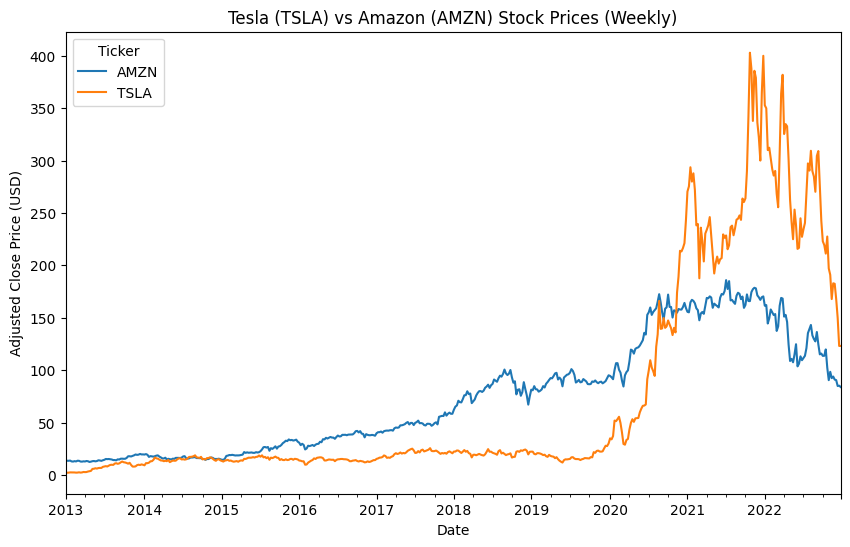


--- ADF Test for TSLA ---
ADF Statistic: -1.107035885741522
p-value: 0.7122579345274538
TSLA series is non-stationary (I(1))


--- ADF Test for AMZN ---
ADF Statistic: -1.2652249748552327
p-value: 0.6449280284687251
AMZN series is non-stationary (I(1))


--- Johansen Test Results ---
Trace Statistic: [16.96541889  3.77006539]
Critical Values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


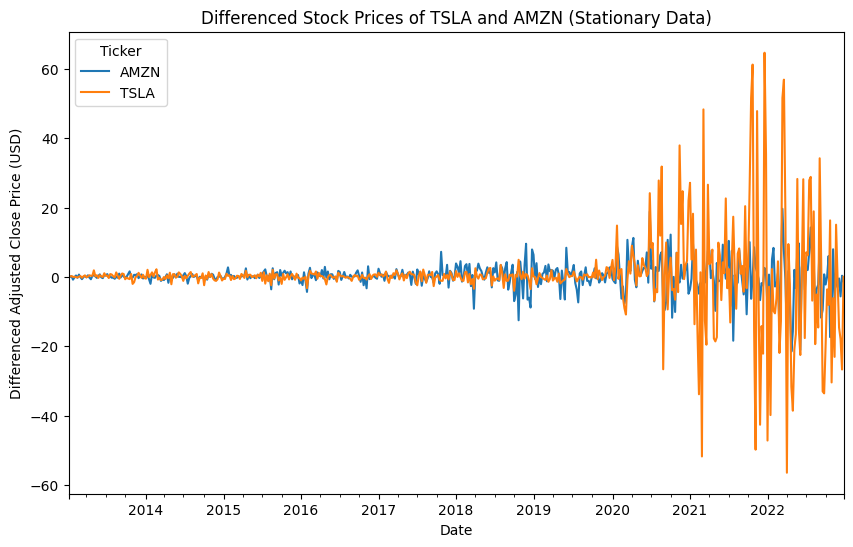


--- ADF Test for Differenced TSLA ---
ADF Statistic: -5.594416301343592
p-value: 1.3068788105077833e-06
Differenced TSLA series is stationary (I(0))


--- ADF Test for Differenced AMZN ---
ADF Statistic: -9.338764861724796
p-value: 8.913875263790662e-16
Differenced AMZN series is stationary (I(0))



In [7]:
import yfinance as yf
import pandas as pd
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Step 1: Fetch Stock Data
# Downloading adjusted closing prices for Tesla (TSLA) and Amazon (AMZN) for the past 10 years
stocks = ['TSLA', 'AMZN']
data = yf.download(stocks, start='2013-01-01', end='2023-01-01', interval='1wk')['Adj Close']

# Check the data structure
print(data.head())

# Plotting the stock prices to visualize the trends
data.plot(figsize=(10, 6), title="Tesla (TSLA) vs Amazon (AMZN) Stock Prices (Weekly)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (USD)")
plt.show()

# Interpretation:
# The plotted data should show clear upward or fluctuating trends over time, indicating that the series may be non-stationary.

# Step 2: Check Non-Stationarity using Augmented Dickey-Fuller (ADF) Test
def adf_test(series, stock_name):
    print(f"\n--- ADF Test for {stock_name} ---")
    result = ts.adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print(f"{stock_name} series is non-stationary (I(1))\n")
    else:
        print(f"{stock_name} series is stationary (I(0))\n")

# Applying ADF test for both TSLA and AMZN
adf_test(data['TSLA'], "TSLA")
adf_test(data['AMZN'], "AMZN")

# Interpretation:
# If the p-value > 0.05 for both series, it confirms that the stock prices are non-stationary (I(1)).

# Step 3: Cointegration Testing (Johansen Test)
# Johansen Cointegration Test requires at least two series
johansen_test = coint_johansen(data, det_order=0, k_ar_diff=1)
print("\n--- Johansen Test Results ---")
print(f"Trace Statistic: {johansen_test.lr1}")
print(f"Critical Values (90%, 95%, 99%): {johansen_test.cvt}")

# Interpretation:
# Cointegration exists if the Trace Statistic is greater than the Critical Values at a chosen significance level (e.g., 95%).
# This would imply a stable long-term relationship between TSLA and AMZN stock prices.

# Step 4: Plotting Differenced Data to Confirm Stationarity
# Differencing to remove trends
data_diff = data.diff().dropna()

# Plotting differenced data
data_diff.plot(figsize=(10, 6), title="Differenced Stock Prices of TSLA and AMZN (Stationary Data)")
plt.xlabel("Date")
plt.ylabel("Differenced Adjusted Close Price (USD)")
plt.show()

# ADF Test on Differenced Data
adf_test(data_diff['TSLA'], "Differenced TSLA")
adf_test(data_diff['AMZN'], "Differenced AMZN")

# Interpretation:
# The differenced data should now pass the ADF test with a p-value < 0.05, confirming stationarity.



<Axes: xlabel='Date'>

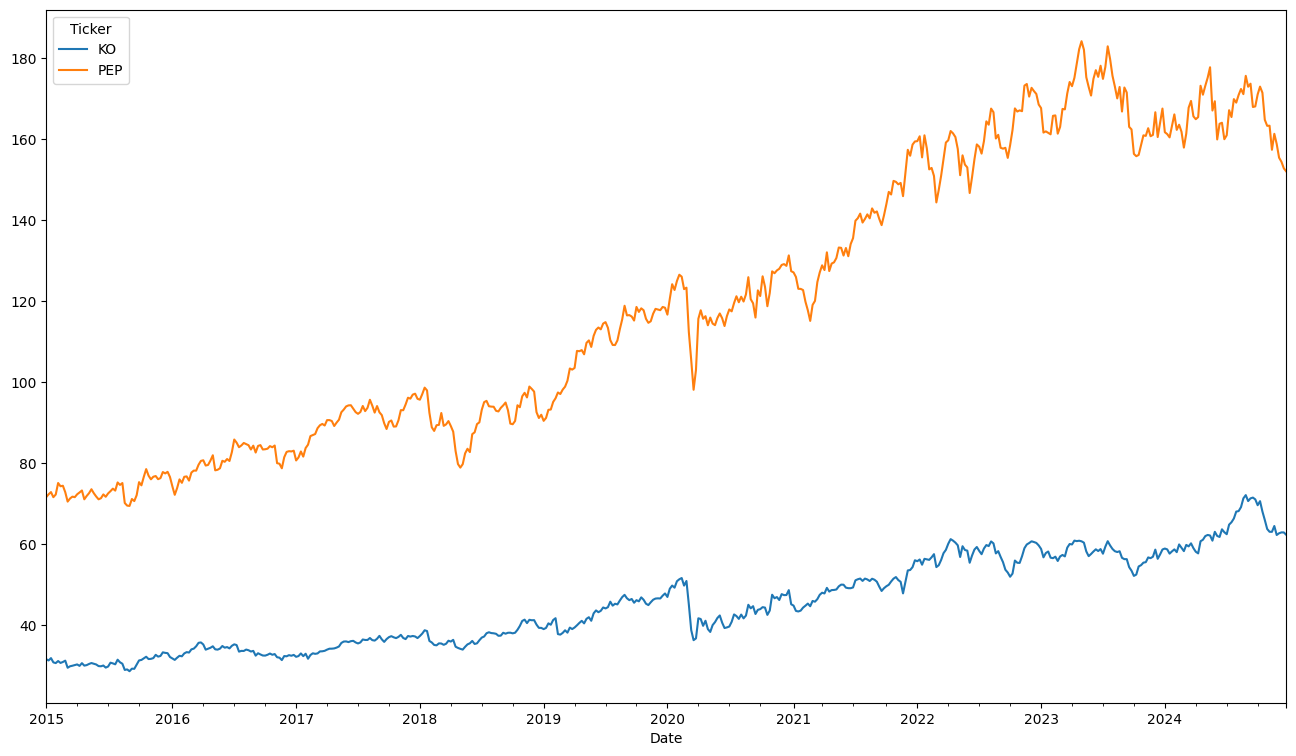

In [ ]:
# plot
data.plot()

<Axes: xlabel='Date'>

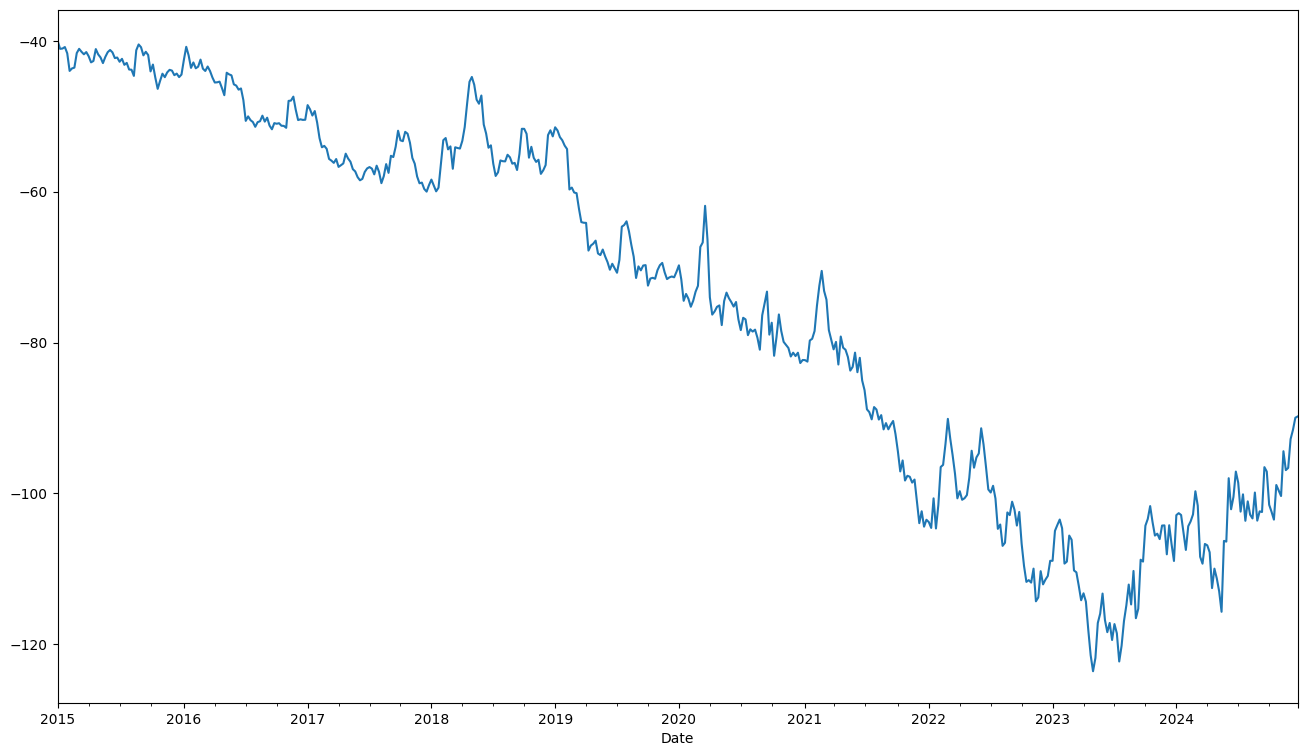

In [ ]:
# difference of two stocks
diff = stock1 - stock2
diff.plot()

In [ ]:
stock1

,KO
Date,
2015-01-01,31.517853
2015-01-08,31.202614
2015-01-15,31.789122
2015-01-22,30.733379
2015-01-29,30.557425
...,...
2024-11-28,62.209999
2024-12-05,62.639999
2024-12-12,62.849998


In [ ]:
# ADF Test Results for stock1
stock1_adf = ADF(stock1, trend="n", method="bic")
print(
    f"{stock1_name} Augmented Dickey-Fuller Unit Root Test\n", stock1_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", stock1_adf)

# ADF Test Results for stock2
stock2_adf = ADF(stock2, trend="n", method="bic")
print(
    f"{stock1_name} Augmented Dickey-Fuller Unit Root Test\n", stock2_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", stock2_adf)

KO Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.034
Date:                Tue, 07 Jan 2025   Prob (F-statistic):                       0.310
Time:                        11:24:38   Log-Likelihood:                         -771.12
No. Observations:                 521   AIC:                                      1544.
Df Residuals:                     520   BIC:                                      1548.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975

In [ ]:
# ADF Test Results for First Difference of stock1
stock1_adf = ADF(stock1.diff().dropna(), trend="n", method="bic")
print(
    f"First Difference of {stock1_name} Augmented Dickey-Fuller Unit Root Test\n", stock1_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", stock1_adf)

# ADF Test Results for First Difference of stock2
stock2_adf = ADF(stock2.diff().dropna(), trend="n", method="bic")
print(
    f"First Difference of {stock1_name} Augmented Dickey-Fuller Unit Root Test\n", stock2_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", stock2_adf)

First Difference of KO Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.470
Model:                            OLS   Adj. R-squared (uncentered):              0.469
Method:                 Least Squares   F-statistic:                              460.5
Date:                Tue, 07 Jan 2025   Prob (F-statistic):                    1.35e-73
Time:                        11:24:38   Log-Likelihood:                         -769.69
No. Observations:                 520   AIC:                                      1541.
Df Residuals:                     519   BIC:                                      1546.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|   

In [ ]:
# Two-Step Residual Based Test for Cointegration for stock1 and stock2
# (aka Phillips and Ouliaris cointegration test)
print(
    phillips_ouliaris(
        stock1, stock2, trend="c", test_type="Za", kernel="bartlett"
    )
)

Phillips-Ouliaris Za Cointegration Test
Statistic: -18.279806849382613
P-value: 0.07976342256283764
Null: No Cointegration, Alternative: Cointegration
Kernel: Bartlett
Bandwidth: 3.3105
Trend: c
Distribution Order: 3


In [ ]:
# Two-Step Residual Based Test for Cointegration for
# First Difference of stock1 and First Difference of stock2
# (aka Phillips and Ouliaris cointegration test)
print(
    phillips_ouliaris(
        stock1.diff().dropna(), stock2.diff().dropna(), trend="c", test_type="Za", kernel="bartlett"
    )
)

Phillips-Ouliaris Za Cointegration Test
Statistic: -519.1884102634066
P-value: 0.0
Null: No Cointegration, Alternative: Cointegration
Kernel: Bartlett
Bandwidth: 5.5650
Trend: c
Distribution Order: 3


In [ ]:
# Error Correction Model Result for stock2 on stock1
ecm_model = UECM(
    endog=pd.DataFrame(stock2),
    lags=1,
    exog=pd.DataFrame(stock1),
    order=1,
    trend="c",
).fit()
print(ecm_model.summary())

                              UECM Model Results                              
Dep. Variable:                  D.PEP   No. Observations:                  522
Model:                     UECM(1, 1)   Log Likelihood               -1065.127
Method:               Conditional MLE   S.D. of innovations            124.558
Date:                Tue, 07 Jan 2025   AIC                           2140.254
Time:                        11:25:03   BIC                           2161.533
Sample:                    01-08-2015   HQIC                          2148.589
                         - 12-26-2024                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1254      0.393      0.319      0.750      -0.646       0.897
PEP.L1        -0.0152      0.010     -1.518      0.130      -0.035       0.004
KO.L1          0.0386      0.032      1.221      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)


In [ ]:
# Error Correction Model Result for stock1 on stock2
ecm_model = UECM(
    endog=pd.DataFrame(stock1),
    lags=1,
    exog=pd.DataFrame(stock2),
    order=1,
    trend="c",
).fit()
print(ecm_model.summary())

                              UECM Model Results                              
Dep. Variable:                   D.KO   No. Observations:                  522
Model:                     UECM(1, 1)   Log Likelihood                -584.382
Method:               Conditional MLE   S.D. of innovations             46.420
Date:                Tue, 07 Jan 2025   AIC                           1178.765
Time:                        11:27:07   BIC                           1200.044
Sample:                    01-08-2015   HQIC                          1187.100
                         - 12-26-2024                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2157      0.156      1.385      0.167      -0.090       0.522
KO.L1         -0.0355      0.012     -2.844      0.005      -0.060      -0.011
PEP.L1         0.0117      0.004      2.961      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)


In [ ]:
# Durbin-Watson Test Result for ECM of stock1 and stock2
print(durbin_watson(ecm_model.fittedvalues))

1.9283168437077998
